In [1]:
import cv2
import tensorflow as tf
# import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data_directory = '/content/drive/MyDrive/project'

# Create an image dataset from the directory
data = tf.keras.utils.image_dataset_from_directory(data_directory)

Found 5731 files belonging to 3 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
# fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
# for idx , img in enumerate (batch[0][:4]):
#   ax[idx].imshow(img.astype(int))
#   ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y : (x/255 ,y ))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [11]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.3)

In [12]:
val_size

36

In [13]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [16]:
model= Sequential()

In [17]:
model.add(Conv2D(16,(3,3),1 , activation='relu',padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile('sgd',loss=tf.keras.losses.BinaryCrossentropy(),metrics='accuracy')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [21]:
logdir = 'logs'

In [22]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
tensorboard_callback

In [24]:
hist= model.fit(train, epochs=20,validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/20
125/125 [==============================] - 1076s 9s/step - loss: 0.5581 - accuracy: 0.2675 - val_loss: 0.5150 - val_accuracy: 0.2882
Epoch 2/20
125/125 [==============================] - 35s 275ms/step - loss: 0.5256 - accuracy: 0.2663 - val_loss: 0.4899 - val_accuracy: 0.2951
Epoch 3/20
125/125 [==============================] - 38s 295ms/step - loss: 0.5213 - accuracy: 0.2668 - val_loss: 0.4872 - val_accuracy: 0.2847
Epoch 4/20
125/125 [==============================] - 38s 300ms/step - loss: 0.5120 - accuracy: 0.2663 - val_loss: 0.4643 - val_accuracy: 0.2899
Epoch 5/20
125/125 [==============================] - 38s 295ms/step - loss: 0.5128 - accuracy: 0.2657 - val_loss: 0.5029 - val_accuracy: 0.2977
Epoch 6/20
125/125 [==============================] - 38s 295ms/step - loss: 0.5012 - accuracy: 0.2657 - val_loss: 0.4724 - val_accuracy: 0.2908
Epoch 7/20
125/125 [==============================] - 39s 302ms/step - loss: 0.4989 - accuracy: 0.2663 - val_loss: 0.5022 - val_acc

In [25]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [26]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 296ms/step


In [28]:
print(pre.result(), re.result(),acc.result())

tf.Tensor(0.50793654, shape=(), dtype=float32) tf.Tensor(0.969697, shape=(), dtype=float32) tf.Tensor(0.24525043, shape=(), dtype=float32)


In [29]:
# Test

TypeError: Image data of dtype object cannot be converted to float

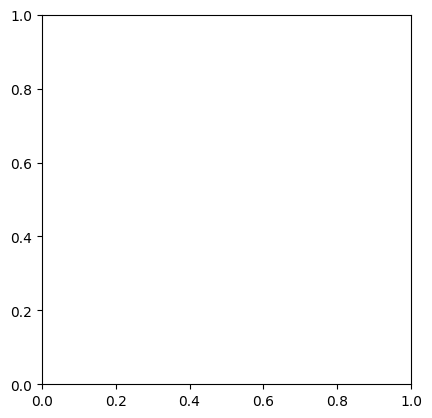

In [30]:
img = cv2.imread('/content/drive/MyDrive/proj/Colgate/Bard_Generated_Image (1)_0_2442.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
  print('Predicted Image is Fake ')
else:
  print('Predicted Image is Original')


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset/Fake Logos/Ariel')
plt.imshow(img)
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

In [ ]:
if yhat > 0.5:
  print('Predicted Image is Fake ')
else:
  print('Predicted Image is Original')

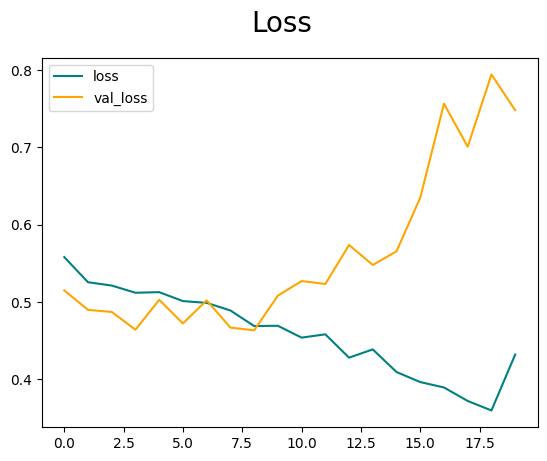

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

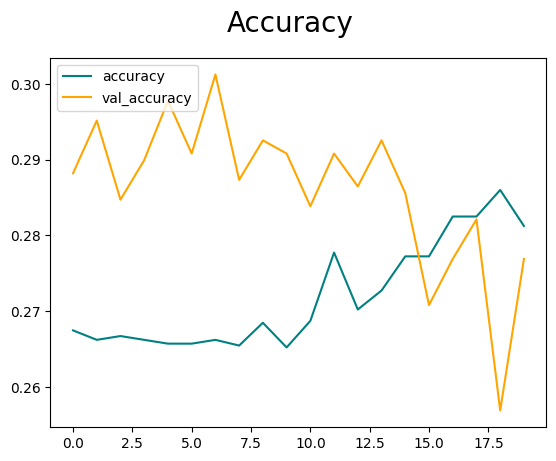

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()